In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import string,re
%matplotlib inline

In [45]:
df = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Spam_Detection/Data/Youtube01-Psy.csv')
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


## Data Analysis

### To check the labels(Class)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [47]:
df.groupby('CLASS').describe().T

CLASS                                                              0  \
COMMENT_ID count                                                 175   
           unique                                                175   
           top                   z122dfb5htjxgpbot04cdj1aikatybbjsb0   
           freq                                                    1   
AUTHOR     count                                                 175   
           unique                                                175   
           top                                          tom hawksbee   
           freq                                                    1   
DATE       count                                                 175   
           unique                                                175   
           top                                   2014-01-21T08:22:06   
           freq                                                    1   
CONTENT    count                                                 175   
           unique                                                174   
           top     PSY - GANGNAM STYLE (강남스타일) M/V: http://youtu....   
           freq                                                    2   

CLASS                                                              1  
COMMENT_ID count                                                 175  
           unique                                                175  
           top                   z12cehoxozfgg3nok04cjj05xznbgrlpfjo  
           freq                                                    1  
AUTHOR     count                                                 175  
           unique                                                170  
           top                                        OutrightIgnite  
           freq                                                    2  
DATE       count                                                 175  
           unique                                                175  
           top                                   2014-11-07T09:04:08  
           freq                                                    1  
CONTENT    count                                                 175  
           unique                                                175  
           top     http://www.ebay.com/itm/131338190916?ssPageNam...  
           freq                                                    1

In [48]:
df['comment_len'] = df.CONTENT.apply(len)

In [49]:
df.CONTENT.value_counts().rename_axis(['CONTENT']).reset_index(name='counts').head()

,CONTENT,counts
0,PSY - GANGNAM STYLE (강남스타일) M/V: http://youtu....,2
1,http://www.bing.com/explore/rewards?PUBL=REFER...,1
2,If I get 300 subscribers by tomorrow I'll do a...,1
3,Like if you came here too see how many views t...,1
4,Show your AUBURN PRIDE HERE: http://www.teespr...,1


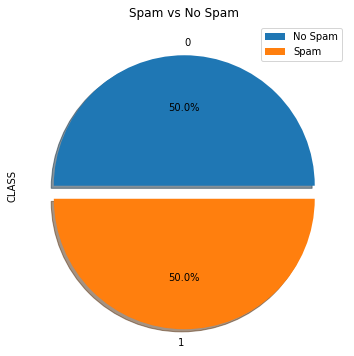

In [50]:
df.CLASS.value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs No Spam")
plt.legend(["No Spam", "Spam"])
plt.show()

Text(0, 0.5, 'Frequency')

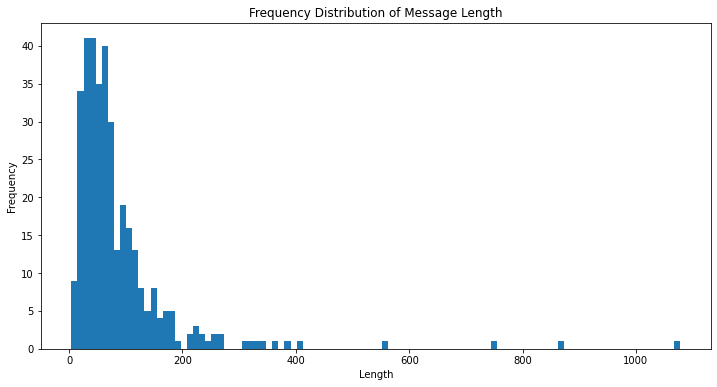

In [51]:
plt.figure(figsize=(12,6))
df.comment_len.plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [52]:
df.comment_len.describe()

count     350.000000
mean       86.885714
std       103.151840
min         4.000000
25%        37.250000
50%        61.000000
75%       100.750000
max      1078.000000
Name: comment_len, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

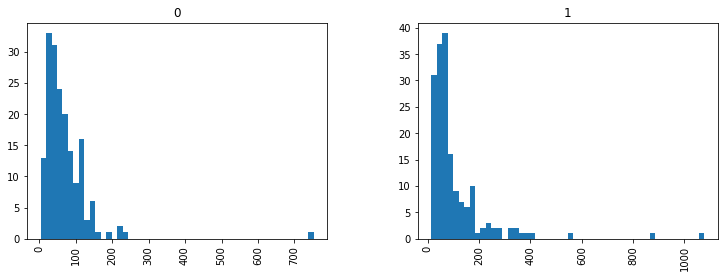

In [53]:
df.hist(column='comment_len', by='CLASS', bins=50,figsize=(12,4))

### Applying Stopwords 

In [54]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

## Cretaing a new column after removing the stopwords and converting it to lower case

In [55]:
df['Content_without_stopwords'] = df.CONTENT.apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stop)]))

## Removing the puntuations

In [56]:
df['Content_without_stopwords'] = df.Content_without_stopwords.apply(lambda x: ''.join([re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", word) for word in x]))

In [57]:
df.Content_without_stopwords = df.Content_without_stopwords.apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))

In [58]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,comment_len,Content_without_stopwords
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,huh anyway check youtube channel kobyoshi02
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166,hey guys check new channel first vid this is u...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38,test i say murdevcom
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,shaking sexy ass channel enjoy
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,watchvvtarggvgtwq check


## Stemming the words

We have a various stemmer option and  don't know what to choose.

- [Stemmer Option](https://towardsdatascience.com/stemming-corpus-with-nltk-7a6a6d02d3e5)

In [59]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df.Content_without_stopwords = [stemmer.stem(i) for i in df.Content_without_stopwords]

## Tokenize

In [60]:
from nltk.tokenize import word_tokenize
df.Content_without_stopwords  = [" ".join(word_tokenize(word)) for word in df.Content_without_stopwords]

## Applying machine learning methods

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [65]:
bow_transformer = vectorizer.fit(df.Content_without_stopwords)

In [67]:
print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))


Total number of vocab words :  1233


In [68]:
messages_bow = bow_transformer.transform(df.Content_without_stopwords)

In [69]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (350, 1233)
Amount of Non-Zero occurences:  2705


In [70]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

## To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [73]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
messages_tfidf.shape

(350, 1233)

### Lets convert our clean text into a representation that a machine learning model can understand. I'll use the Tfifd for this.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(df.Content_without_stopwords)
print(features.shape)

print(len(vec.vocabulary_))

(350, 1107)
1107


### Performing train test spilt

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.Content_without_stopwords
y = df.CLASS

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Implementing Support Vector Machine algorithm

In [77]:
from sklearn.svm import SVC

In [78]:
sv = SVC()
sv.fit(X_train,y_train)

ValueError: could not convert string to float: 'the liked video youtub'